In [3]:
import os
import csv

# Define the directories containing the Python files
buggy_dir = "C:/Users/Edzel Armengol/Desktop/GITHUB/Code/buggy_dataset/buggy_snippets_files"
stable_dir = "C:/Users/Edzel Armengol/Desktop/GITHUB/Code/stable_snippets_files"

# Define the output CSV file path
output_csv = "C:/Users/Edzel Armengol/Desktop/GITHUB/Code/combined_snippets.csv"

# Function to read Python files from a directory
def read_python_files(directory, category, limit):
    data = []
    count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.py'):
            file_path = os.path.join(directory, filename)
            try:
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                    code = file.read()
                    data.append([code, category])
                    count += 1
                    if count >= limit:
                        break
            except Exception as e:
                print(f"Skipping {filename} due to error: {e}")  # Log the file causing issues
    return data

# Read 10,000 buggy Python files
buggy_data = read_python_files(buggy_dir, 'Buggy', 5000)

# Read 10,000 stable Python files
stable_data = read_python_files(stable_dir, 'Non-Buggy', 5000)

# Combine the data
combined_data = buggy_data + stable_data

# Write the combined data to a CSV file
with open(output_csv, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Code", "Category"])  # Write the header
    writer.writerows(combined_data)  # Write the data

print(f"CSV file created successfully at: {output_csv}")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Edzel Armengol/Desktop/GITHUB/Code/stable_snippets_files'

✅ Tokenizer saved as 'BugTokenizer.pkl'
Epoch 1/8


c:\Users\Edzel Armengol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\Edzel Armengol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5128 - loss: 0.6777Epoch 1: Learning Rate = 0.001000
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - accuracy: 0.5136 - loss: 0.6766 - val_accuracy: 0.6032 - val_loss: 0.5633
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5881 - loss: 0.5562Epoch 2: Learning Rate = 0.001000
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.5881 - loss: 0.5563 - val_accuracy: 0.6032 - val_loss: 0.5627
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6086 - loss: 0.5783Epoch 3: Learning Rate = 0.001000
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.6086 - loss: 0.5782 - val_accuracy: 0.5873 - val_loss: 0.5657
Epoch 4/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6044 - loss: 0.5645Epoch 4: Learning Rate = 0.001000
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.6044 - loss: 0.5644 - val_accuracy: 0.6032 - val_loss: 0.5629
Epoch 5/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6014

✅ Model saved as 'bug_localization_model.h5'
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5901 - loss: 0.5751
Test Accuracy: 60.32%


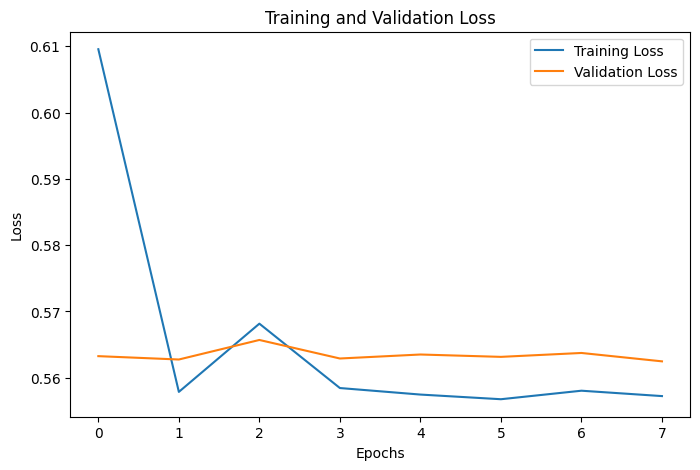


Learning Rate Progression per Epoch:
Epoch 1: 0.001000
Epoch 2: 0.001000
Epoch 3: 0.001000
Epoch 4: 0.001000
Epoch 5: 0.001000
Epoch 6: 0.001000
Epoch 7: 0.001000
Epoch 8: 0.001000


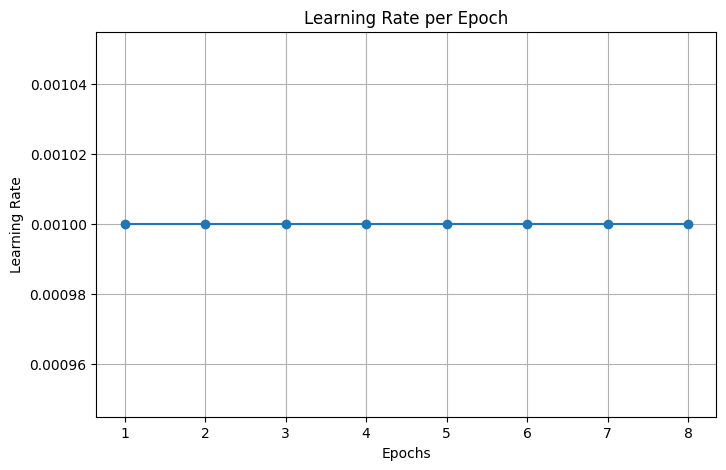

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle  # Import pickle for saving tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Dropout, Embedding, Flatten
from tensorflow.keras.layers import LeakyReLU, ReLU, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset (Update the path)
csv_path = "C:/Users/Edzel Armengol/Desktop/GITHUB/Code/BugLocalization/combined_java_snippets.csv"  # Update with actual path
df = pd.read_csv(csv_path)

# Convert 'Category' column to binary labels (Buggy = 1, Non-Buggy = 0)
df["Category"] = df["Category"].apply(lambda x: 1 if x == "Buggy" else 0)

# Tokenize Java code snippets (character-level tokenization)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df["Code"])

# Save tokenizer as 'BugTokenizer.pkl'
with open("BugTokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("✅ Tokenizer saved as 'BugTokenizer.pkl'")

# Convert text to sequences and pad them
X = tokenizer.texts_to_sequences(df["Code"])
X = pad_sequences(X, maxlen=500, padding="post")  # Limit to 500 characters per snippet

# Convert labels to NumPy array
y = np.array(df["Category"])

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Bug Localization Model
model = Sequential([
    # Embedding layer to convert character sequences into dense vectors
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=500),
    
    # CNN Layer for feature extraction
    Conv1D(filters=64, kernel_size=3, padding="same"),
    LeakyReLU(alpha=0.1),  # Activation Function 1: LeakyReLU
    
    # LSTM Layer for sequence processing
    LSTM(50, return_sequences=False),
    
    # Fully Connected Layers
    Dense(128),
    ReLU(),  # Activation Function 2: ReLU
    Dropout(0.3),
    
    Dense(64),
    Activation("sigmoid"),  # Activation Function 3: Sigmoid
    
    # Output Layer (Binary Classification: Buggy or Non-Buggy)
    Dense(1, activation="sigmoid")
])


# Compile model with learning rate tracking
initial_lr = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)  # Initial learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define a callback to track learning rate
class LearningRateTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        self.learning_rates = []

    def on_epoch_end(self, epoch, logs=None):
        lr = float(self.model.optimizer.learning_rate.numpy())  # Convert to float for better readability
        self.learning_rates.append(lr)
        print(f"Epoch {epoch+1}: Learning Rate = {lr:.6f}")

# Initialize learning rate tracker
lr_tracker = LearningRateTracker()

# Train model and store history
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_tracker])

# Extract training history
history_dict = history.history

# Save the trained model
model.save("bug_localization_model.h5")
print("✅ Model saved as 'bug_localization_model.h5'")

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training & validation loss values
plt.figure(figsize=(8,5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Print learning rate values numerically
print("\nLearning Rate Progression per Epoch:")
for epoch, lr in enumerate(lr_tracker.learning_rates, start=1):
    print(f"Epoch {epoch}: {lr:.6f}")

# Plot learning rate progression
plt.figure(figsize=(8,5))
plt.plot(range(1, 9), lr_tracker.learning_rates, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate per Epoch")
plt.grid(True)
plt.show()


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Accuracy: 0.59
Precision: 1.00
Recall: 0.32
F1-score: 0.48


In [8]:
import tensorflow as tf
import numpy as np
import pickle
import groq
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set up Groq API Key
groq.api_key = "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"

# Load trained bug detection model
model = tf.keras.models.load_model("bug_localization_model.h5")

# Load tokenizer
with open("BugTokenizer.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)

# Tokenization settings
max_len = 500  # Must match training settings

def predict_bug_status_ml(java_code):
    """Predict if a Java code snippet is Buggy or Non-Buggy using ML model."""
    # Convert user input to a sequence
    sequence = tokenizer.texts_to_sequences([java_code])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding="post")

    # Get ML model prediction (probability between 0-1)
    prediction = model.predict(padded_sequence)[0][0]

    return prediction  # Higher values mean more likely buggy

def classify_bug(java_code):
    client = groq.Client(api_key=groq.api_key)
    response = client.chat.completions.create(
        model="llama-3.3-70b-versatile",
        messages=[
            {"role": "system", "content": 
                "Analyze the following Java code snippet and determine if it looks like it is buggy or not. "
                "If the code contains poor practices, missing conditions, potential runtime errors, or looks structurally incorrect, consider it buggy. "
                "Otherwise, if the code follows good syntax and logic, consider it non-buggy. "
                "Return a probability score between 0 and 1, where: "
                "0 = Absolutely non-buggy, 1 = Absolutely buggy. "
                "Return only the probability value. Do not include any other text."
            },
            {"role": "user", "content": java_code}
        ]
    )

    # Extract the probability from Groq response
    groq_score_text = response.choices[0].message.content.strip()

    try:
        groq_score = float(groq_score_text)
        if 0 <= groq_score <= 1:
            return groq_score
    except ValueError:
        return None  # If Groq fails, ignore its result

def compute_final_bug_score(ml_score, groq_score):
    """Combine ML model and Groq's predictions, giving Groq 75% weight."""
    if groq_score is None:
        return "Response invalid. ML Score: " + ("Buggy" if ml_score > 0.5 else "Non-Buggy")

    # Weighted final decision (Groq 75%, ML 25%)
    final_score = (ml_score * 0.25) + (groq_score * 0.75)

    # Classify as Buggy or Non-Buggy
    return "Buggy Code Detected!" if final_score > 0.5 else "Code is Non-Buggy!"


# Get user input (multi-line support)
print("\n💻 Enter your Java code snippet (Press Enter twice to finish):")
java_code = ""
while True:
    try:
        line = input()
        if line.strip() == "":  # Stop input on empty line
            break
        java_code += line + "\n"
    except EOFError:
        break

# Predict bug status using both ML model and Groq
ml_prediction = predict_bug_status_ml(java_code)
prediction = classify_bug(java_code)

# Compute final decision
final_result = compute_final_bug_score(ml_prediction, prediction)

# Display result
print("\n🔍 Bug Localization Analysis:")
print(final_result)



💻 Enter your Java code snippet (Press Enter twice to finish):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step

🔍 Bug Localization Analysis:
Code is Non-Buggy!
